<a href="https://colab.research.google.com/github/MaureenMbugua/ANNAudioClassification/blob/main/AudioClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Exploratory Data Analysis
#Install libraries #librosa #librosa

In [ ]:
!pip install librosa

In [ ]:
#for displaying signal
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename='//NonverbalVocalization/NonverbalVocalization/2CVI_15_11_0_15_0_0_0.wav'

In [ ]:
#for displaying graphs in a certain manner
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/NonverbalVocalization.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/NonverbalVocalization') #Extracts the files into the /tmp folder
zip_ref.close()

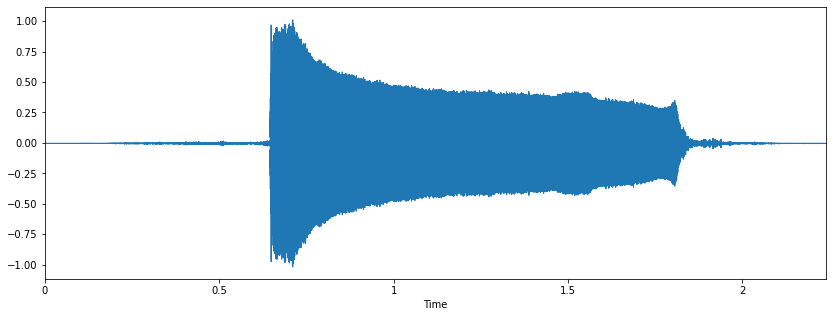

In [ ]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)#gives two sets of info
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
sample_rate


22050

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [ ]:
wave_sample_rate

16000

In [ ]:
wave_audio

array([ 0,  0,  0, ..., 15, 15, 17], dtype=int16)

In [ ]:
data

array([0.        , 0.        , 0.        , ..., 0.00044033, 0.00056158,
       0.00039001], dtype=float32)

In [ ]:
import json
with open("NonverbalVocalization/Nonverbal_Vocalization.json", "r") as read_file:
    mdata = json.load(read_file)

In [ ]:
import pandas as pd

metadata=pd.read_csv("/NonverbalVocalization/NonverbalVocalization/Nonverbal_Vocalization.csv")
metadata.head()

,audfile_name,age,noise,sex,speakerID,class_ID,class_name
0,87LX_0_6_0_19_0_0_0.wav,19,0,0,87LX,0,teeth-chattering
1,4MYS_0_5_0_27_0_0_0.wav,27,0,0,4MYS,0,teeth-chattering
2,F8BC_0_6_0_14_0_0_0.wav,14,0,0,F8BC,0,teeth-chattering
3,TZCX_0_3_0_20_0_0_0.wav,20,0,0,TZCX,0,teeth-chattering
4,CTTJ_0_10_0_14_0_0_0.wav,14,0,0,CTTJ,0,teeth-chattering


In [ ]:
#Extract Features for Classification
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
mfccs


array([[-5.3737079e+02, -5.3737079e+02, -5.3737079e+02, ...,
        -5.2416022e+02, -5.2323865e+02, -5.2497742e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.8584249e+01,  1.9869776e+01,  1.7438576e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.8291756e+01,  1.9524261e+01,  1.7175488e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.2395653e-01,  1.5370879e+00,  6.9571972e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -3.7662068e-01,  1.5612111e+00,  8.7277460e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -5.2437663e-01,  1.5261453e+00,  9.9874914e-01]], dtype=float32)

In [ ]:
#Extracting MFCC's for every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/NonverbalVocalization/NonverbalVocalization'
metadata.head(10)

,audfile_name,age,noise,sex,speakerID,class_ID,class_name
0,87LX_0_6_0_19_0_0_0.wav,19,0,0,87LX,0,teeth-chattering
1,4MYS_0_5_0_27_0_0_0.wav,27,0,0,4MYS,0,teeth-chattering
2,F8BC_0_6_0_14_0_0_0.wav,14,0,0,F8BC,0,teeth-chattering
3,TZCX_0_3_0_20_0_0_0.wav,20,0,0,TZCX,0,teeth-chattering
4,CTTJ_0_10_0_14_0_0_0.wav,14,0,0,CTTJ,0,teeth-chattering
5,VVBA_0_4_0_23_0_0_0.wav,23,0,0,VVBA,0,teeth-chattering
6,CNWF_0_3_0_20_0_0_0.wav,20,0,0,CNWF,0,teeth-chattering
7,O5E1_0_6_1_29_0_0_0.wav,29,0,1,O5E1,0,teeth-chattering
8,5AG3_0_3_1_18_0_0_0.wav,18,0,1,5AG3,0,teeth-chattering
9,OI67_0_2_1_22_0_0_0.wav,22,0,1,OI67,0,teeth-chattering


In [ ]:
#creating a feature extractor function
#loads the audio file, extracts features and finds scaled features by finding mean of transpose of value of mfcc features
 
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
#iterating through every audio file and extracting features
import numpy as np
from tqdm import tqdm

extracted_features=[] #list to store the features and class label
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), str(row["class_name"])+'/', str(row["audfile_name"]))
    final_class_labels = row["class_name"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels]) #our dependent and independent features, later converted into a dataframe

727it [00:30, 24.06it/s]


In [ ]:
#converting the features into a Pandas dataframe

extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(20)

,feature,class
0,"[-596.0521, 46.280857, 21.179968, 21.595993, 1...",teeth-chattering
1,"[-430.47748, 165.47548, -19.052588, 2.3916497,...",teeth-chattering
2,"[-490.7734, 108.566605, -22.723782, 39.0963, -...",teeth-chattering
3,"[-501.74335, 143.3307, 2.2156296, 18.220789, -...",teeth-chattering
4,"[-514.83105, 145.79393, -28.424004, 60.687637,...",teeth-chattering
5,"[-627.4276, 126.80181, -38.632298, 49.74178, -...",teeth-chattering
6,"[-680.6681, 82.789894, -11.279946, 47.058838, ...",teeth-chattering
7,"[-534.5318, 183.14403, 51.81739, 41.85067, -2....",teeth-chattering
8,"[-646.11005, 110.1571, -18.720848, 54.75976, -...",teeth-chattering
9,"[-543.9393, 139.39474, -15.06812, 37.28891, -1...",teeth-chattering


In [ ]:
#split into independent and dependent dataset
X = np.array(extracted_features_df["feature"].tolist()) #convert series to list then array
Y = np.array(extracted_features_df["class"].tolist())
Y.shape

(727,)

In [ ]:
#Label encoding
#split
y = np.array(pd.get_dummies(Y))
y.shape


(727, 16)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
 X_train.shape

(581, 40)

In [ ]:
y_train.shape

(581, 16)

In [ ]:
X_test.shape

(146, 40)

# Model Creation

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_labels=y.shape[1]

In [ ]:
model = Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 5000
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Streaming output truncated to the last 5000 lines.
12/19 [=================>............] - ETA: 0s - loss: 1.1436 - accuracy: 0.6328
Epoch 03751: val_loss did not improve from 2.21545
19/19 [==============================] - 0s 7ms/step - loss: 1.1431 - accuracy: 0.6145 - val_loss: 3.0852 - val_accuracy: 0.4521
Epoch 3752/5000
14/19 [=====================>........] - ETA: 0s - loss: 1.0298 - accuracy: 0.6406
Epoch 03752: val_loss did not improve from 2.21545
19/19 [==============================] - 0s 8ms/step - loss: 1.0260 - accuracy: 0.6368 - val_loss: 3.1907 - val_accuracy: 0.4589
Epoch 3753/5000
12/19 [=================>............] - ETA: 0s - loss: 1.0716 - accuracy: 0.6146
Epoch 03753: val_loss did not improve from 2.21545
19/19 [==============================] - 0s 7ms/step - loss: 1.0526 - accuracy: 0.6059 - val_loss: 3.1002 - val_accuracy: 0.4589
Epoch 3754/5000
12/19 [=================>............] - ETA: 0s - loss: 0.9273 - accuracy: 0.6641
Epoch 03754: val_loss did not